***Author:*** Yolanda Pan

***Rearch Question:*** <font color="red">How dynamics of conversation affect the perceived enjoyment?</font>



## Literature Review

**THEORIES** 

Conversation is one of the most fundamental forms of human social interaction, linked not only to information exchange but also to emotional well-being and social connectedness. Even minimal interactions with strangers have been shown to increase happiness, despite people’s tendency to underestimate the depth and enjoyment such conversations can generate (Epley & Schroeder, 2014; Kardas, Kumar, & Epley, 2022; Schroeder et al., 2022). This body of work positions conversation as an affective and relational act, where the perceived risk of awkwardness or superficiality is often misjudged relative to the actual richness that emerges through interaction.

Emerging research in social and cognitive psychology has sought to identify what makes some conversations more enjoyable than others. <font color="blue">Depth of self-disclosure</font> (Kardas, Kumar, & Epley, 2017), <font color="blue">novelty of content</font> (Kardas, Schroeder, & O’Brien, 2022), and <font color="blue">the opportunity to share interesting personal experiences</font> (Westgate & Wilson, 2018) have all been associated with increased conversational satisfaction. Computational work in dialogue systems echoes these findings: <font color="blue">repetitions and semantic redundancy decrease perceived engagement</font> (See, Roller, Kiela, & Weston, 2019), while <font color="blue">faster-paced, less repetitive conversational exchanges are rated as more dynamic and enjoyable</font> (Templeton et al., 2022). Together, these studies suggest that topic movement—the process by which a conversation transitions across ideas—may be a core mechanism driving conversational enjoyment.

Recent work has begun to formalize this intuition. Speer et al. (2025) argue that conversational strategies differ depending on social context: strangers tend to favor breadth-oriented exploration of topics, whereas friends engage in depth-oriented elaboration. This suggests that topic exploration is not monolithic but structured—conversations may oscillate between semantic exploration and convergence, forming distinct trajectory patterns. Yet, despite growing theoretical focus on topic dynamics, most studies rely on human coding or qualitative annotations, limiting scalability and making it difficult to analyze conversational exploration across thousands of interactions.


**METHODOLOGY**

In the work of <font color="blue">Speer et al. (2025)</font>, conversation is conceptualized through a topic foraging framework rather than as movement across a fixed set of predefined topic categories. Using **BERTopic**, they generated **high-dimensional topic embeddings** for each sentence in every dyad, allowing conversation to be represented as a trajectory through semantic space. They then quantified semantic dispersion by measuring how far each new segment moved from previously occupied regions of this space, interpreting greater dispersion as exploratory topic movement and lower dispersion as convergent elaboration. **In addition, they counted the number of unique topic clusters encountered and the frequency of topic switches to approximate the breadth and dynamism of conversational content.** These metrics were linked to conversational enjoyment as well as social context, with strangers tending toward wider semantic exploration and friends showing more localized elaboration within a narrower topical region.

In the study by <font color="blue">Tempelton et al. (2024)</font> on conversation **launch pads**, the authors divided 10-minute free conversations between two Dartmouth students into 30-second segments and extracted embeddings for each segment using Google’s Universal Sentence Encoder (**USE**). They then applied **UMAP** to project the embeddings into a lower-dimensional space and performed **k-means clustering** to identify topic groups, **labeling** each cluster based on **word clouds** generated from its associated content.

In the CANDOR project, <font color="blue">Cooney, Reece, and colleagues (2023)</font> developed a computational framework for analyzing large-scale dyadic conversation by integrating global semantic distance with local novelty dynamics. To assess overall alignment between speakers, they computed **Word Mover’s Distance (WMD)** (Kusner, Koklin, & Weinberger, 2015) between the full transcripts of each conversational partner, interpreting higher WMD values as greater semantic divergence across the dyad. At the turn level, they generated **MPNet-based sentence embeddings** and **calculated the cosine distance between each turn** and the immediately preceding one, using this as an index of **semantic novelty** introduction. Instead of imposing discrete topic categories, their analysis focused on the **temporal distribution of novelty spikes**, highlighting how some participants introduce meaningful semantic shifts while others produce turns that remain close in content to previous contributions. By linking these novelty patterns to subjective enjoyment ratings, they argue that effective conversationalists do not simply maximize novelty, but rather oscillate between continuity and departure, strategically modulating semantic movement throughout the interaction.

Thus, topic shift presents a compelling next step for inquiry. Rather than focusing solely on moment-to-moment novelty or initial “launch pad” topics, I propose to model conversation as a network of semantic flow—capturing how ideas recur, diverge, and reconnect over time. This approach extends the work of Templeton et al. (2024), who examined local topic transitions within brief conversational windows, and complements Cooney et al. (2023), who quantified novelty primarily through sequential turn-level comparisons. <font color="red"> By constructing a full semantic network of each conversation, this study aims to uncover higher-order structural patterns of topic movement—how conversational content diffuses, clusters, or loops back—providing a more holistic view of how conversational dynamics shape perceived engagement and enjoyment.</font>

## Data

* The files are too big to save under *final_proj* file. The data is saved under /project/macs40123/yolanda/candor_parquet
* One preprocessing step is to generate **embeddings** for the trascript, that is under **itr_1**


### Description 

The dataset consists of dyadic free-form conversations between pairs of strangers collected in semi-naturalistic online settings. Each conversation is transcribed at the turn level, with accompanying metadata describing speaker roles, turn timing, duration, and linguistic features. The dataset includes both linguistic and behavioral measures (e.g., number of questions, backchannels, word counts) and subjective survey ratings of conversational quality (e.g., enjoyment, liking, engagement).

In total, the dataset comprises 1,656 unscripted video-chat conversations, totaling more than 7 million words and over 850 hours of audio and video recordings (Reece et al., 2023). Participants were paired automatically through a custom matching algorithm and instructed to engage in a natural conversation for at least 25 minutes, though many sessions extended beyond that duration. All conversations were conducted during the 2020 data collection period.

The present data exploratory analysis focuses on the structural and behavioral dynamics of these conversations—specifically duration, question frequency, and backchanneling patterns—and examines how these features relate to participants’ self-reported conversational experiences in post-interaction surveys.

### EDA

In [2]:
# %pip install --user --no-cache-dir duckdb
# %pip install --user fastparquet

import os
import duckdb
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
# ------------- io helpers -------------
def read_parquet_any(path: str) -> pd.DataFrame:
    """
    Read parquet using pyarrow if available, else fastparquet.
    """
    try:
        return pd.read_parquet(path, engine="pyarrow")
    except Exception:
        return pd.read_parquet(path, engine="fastparquet")


def write_parquet_any(df: pd.DataFrame, path: str) -> None:
    """
    Write parquet using pyarrow if available, else fastparquet.
    """
    try:
        df.to_parquet(path, engine="pyarrow", index=False)
    except Exception:
        df.to_parquet(path, engine="fastparquet", index=False)


In [4]:
survey = read_parquet_any('/project/macs40123/yolanda/candor_parquet/survey.ALL.parquet')
bb = read_parquet_any('/project/macs40123/yolanda/candor_parquet/transcript_backbiter.ALL.parquet')

In [5]:
bb.head(3)

,turn_id,speaker,start,stop,utterance,backchannel,backchannel_count,backchannel_speaker,backchannel_start,backchannel_stop,interval,delta,questions,end_question,overlap,n_words,conversation_id
0,0,5f482b0da1cde52de45f174c,1.94,173.96,"Oh, mm hmm. Yeah. Mhm. Mhm. Uh huh. Mhm. Yeah....",Okay. Yes.,1,5f57120cba207c18f058a62b,168.54,169.4,NaN,172.02,0,False,False,50,002d68da-7738-4177-89d9-d72ae803e0e4
1,1,5f57120cba207c18f058a62b,173.94,175.76,"Hello, How are you",None,0,None,NaN,NaN,-0.02,1.82,0,False,True,4,002d68da-7738-4177-89d9-d72ae803e0e4
2,2,5f482b0da1cde52de45f174c,175.54,177.96,Okay. And you?,None,0,None,NaN,NaN,-0.22,2.42,1,True,True,3,002d68da-7738-4177-89d9-d72ae803e0e4


#### Convo as whole

In [6]:
for col in ["start", "stop", "n_words", "questions", "backchannel_count"]:
    bb[col] = pd.to_numeric(bb[col], errors="coerce")

# ---- (1) conversation-level ----
def duration(group):
    return group["stop"].max() - group["start"].min()

def avg_active(series):
    active = series[series > 0]
    return active.mean() if len(active) > 0 else 0

conv_summary = (
    bb.groupby("conversation_id")
    .apply(
        lambda g: pd.Series({
            # time / size
            "conv_total_duration": duration(g),
            "conv_total_turn": g["turn_id"].nunique(),
            "conv_total_words": g["n_words"].sum(),
            "conv_avg_words_per_turn": g["n_words"].mean(),

            # questions (mirroring backchannel)
            "conv_total_questions": g["questions"].sum(),
            "conv_question_turn_proportion": (g["questions"] > 0).mean(),
            "conv_avg_questions_per_turn": g["questions"].mean(),
            "conv_avg_questions_per_active_turn": avg_active(g["questions"]),

            # backchannels
            "conv_backchannel_count": g["backchannel_count"].sum(),
            "conv_backchannel_turn_proportion": (g["backchannel_count"] > 0).mean(),
            "conv_avg_backchannel_per_turn": g["backchannel_count"].mean(),
            "conv_avg_backchannel_per_active_turn": avg_active(g["backchannel_count"]),
        })
    )
    .reset_index()
)

/home/xpan02/ipykernel_1661931/1060744730.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [7]:
conv_summary.head(3)

,conversation_id,conv_total_duration,conv_total_turn,conv_total_words,conv_avg_words_per_turn,conv_total_questions,conv_question_turn_proportion,conv_avg_questions_per_turn,conv_avg_questions_per_active_turn,conv_backchannel_count,conv_backchannel_turn_proportion,conv_avg_backchannel_per_turn,conv_avg_backchannel_per_active_turn
0,0020a0c5-1658-4747-99c1-2839e736b481,2728.66,345.0,7699.0,22.315942,57.0,0.136232,0.165217,1.212766,352.0,0.397101,1.020290,2.569343
1,002d68da-7738-4177-89d9-d72ae803e0e4,2203.28,301.0,7110.0,23.621262,52.0,0.142857,0.172757,1.209302,172.0,0.322259,0.571429,1.773196
2,00411458-8275-4b92-a000-d52187f03604,2237.11,234.0,7372.0,31.504274,53.0,0.183761,0.226496,1.232558,249.0,0.380342,1.064103,2.797753


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Basic info
conv_summary.info()
conv_summary.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   conversation_id                       1656 non-null   object 
 1   conv_total_duration                   1656 non-null   float64
 2   conv_total_turn                       1656 non-null   float64
 3   conv_total_words                      1656 non-null   float64
 4   conv_avg_words_per_turn               1656 non-null   float64
 5   conv_total_questions                  1656 non-null   float64
 6   conv_question_turn_proportion         1656 non-null   float64
 7   conv_avg_questions_per_turn           1656 non-null   float64
 8   conv_avg_questions_per_active_turn    1656 non-null   float64
 9   conv_backchannel_count                1656 non-null   float64
 10  conv_backchannel_turn_proportion      1656 non-null   float64
 11  conv_avg_backchan

,count,mean,std,min,25%,50%,75%,max
conv_total_duration,1656.0,2019.075516,550.937647,116.220000,1683.647500,1852.825000,2151.095000,5901.210000
conv_total_turn,1656.0,336.874396,152.826703,7.000000,241.000000,310.000000,395.000000,1834.000000
conv_total_words,1656.0,5560.731280,1563.278523,53.000000,4666.000000,5259.500000,6003.250000,16991.000000
conv_avg_words_per_turn,1656.0,18.550517,7.230371,2.788986,13.454383,16.881674,21.957984,67.303571
conv_total_questions,1656.0,53.060386,20.561542,1.000000,39.000000,49.000000,63.000000,196.000000
conv_question_turn_proportion,1656.0,0.141889,0.045591,0.027263,0.108681,0.136427,0.168978,0.344444
conv_avg_questions_per_turn,1656.0,0.169992,0.061837,0.031080,0.125183,0.161183,0.204554,0.610592
conv_avg_questions_per_active_turn,1656.0,1.189981,0.135543,1.000000,1.107143,1.166667,1.235294,3.438596
conv_backchannel_count,1656.0,273.237923,100.796095,4.000000,205.750000,259.000000,322.000000,951.000000
conv_backchannel_turn_proportion,1656.0,0.356774,0.062785,0.091603,0.313624,0.355832,0.400000,0.547945


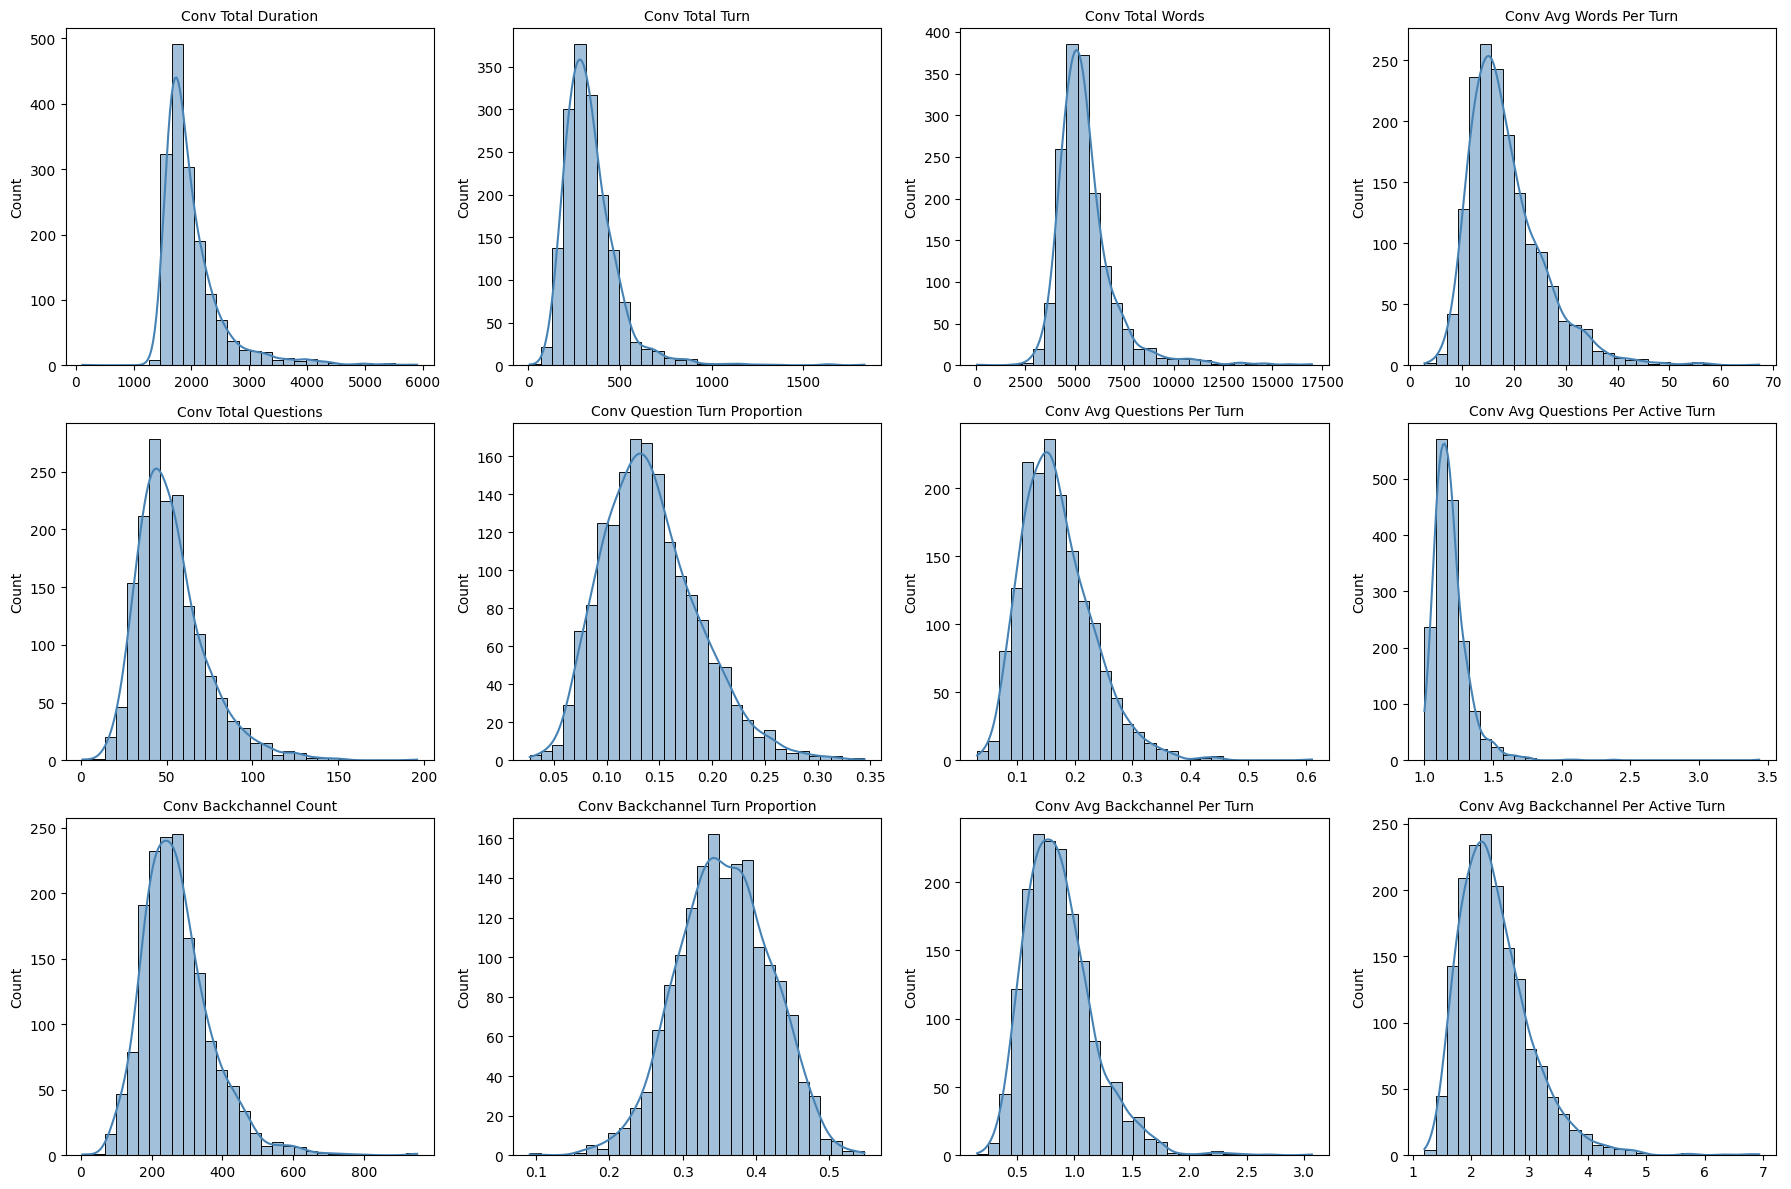

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# include question metrics too
num_cols = [
    "conv_total_duration",
    "conv_total_turn",
    "conv_total_words",
    "conv_avg_words_per_turn",
    "conv_total_questions",
    "conv_question_turn_proportion",
    "conv_avg_questions_per_turn",
    "conv_avg_questions_per_active_turn",
    "conv_backchannel_count",
    "conv_backchannel_turn_proportion",
    "conv_avg_backchannel_per_turn",
    "conv_avg_backchannel_per_active_turn"
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(conv_summary[col], bins=30, kde=True, color="steelblue")
    plt.title(col.replace("_", " ").title(), fontsize=10)
    plt.xlabel("")
plt.tight_layout()
plt.show()

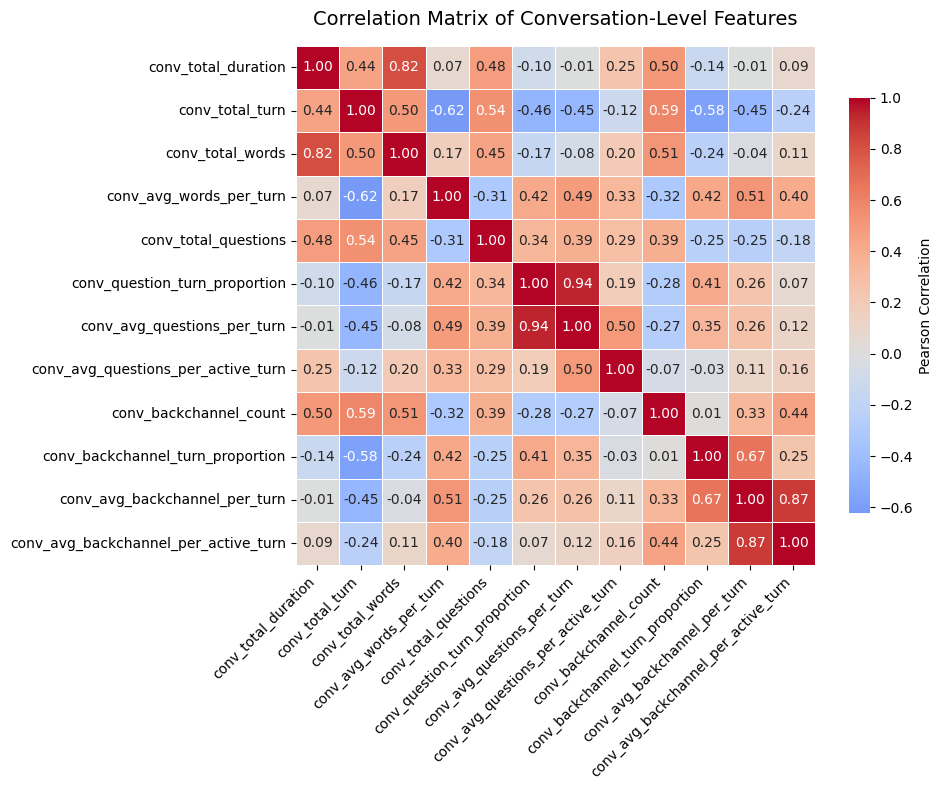

In [9]:
# Compute correlation matrix
corr = conv_summary[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Pearson Correlation"}
)
plt.title("Correlation Matrix of Conversation-Level Features", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Convo per speaker

In [10]:
for col in ["start", "stop", "n_words", "questions", "backchannel_count"]:
    bb[col] = pd.to_numeric(bb[col], errors="coerce")

# ensure delta exists or recompute it
if "delta" not in bb.columns:
    bb["delta"] = bb["stop"] - bb["start"]

def avg_active(series):
    active = series[series > 0]
    return active.mean() if len(active) > 0 else 0

# ---------------------------------------------------------
# A. speaker-side aggregates (when this person is TALKING)
# ---------------------------------------------------------
speaker_view = (
    bb.groupby(["conversation_id", "speaker"])
    .apply(
        lambda g: pd.Series({
            # time / size
            "duration": g["delta"].sum(),
            "total_turns": g["turn_id"].nunique(),
            "total_words": g["n_words"].sum(),
            "avg_words_per_turn": g["n_words"].mean(),

            # questions (as talker)
            "total_questions": g["questions"].sum(),
            "question_turn_proportion": (g["questions"] > 0).mean(),
            "avg_questions_per_turn": g["questions"].mean(),
            "avg_questions_per_active_turn": avg_active(g["questions"]),

            # backchannels RECEIVED (others backchanneled while I was talking)
            "rcv_backchannel_count": g["backchannel_count"].sum(),
            "rcv_backchannel_turn_prop": (g["backchannel_count"] > 0).mean(),
            "rcv_avg_backchannel_per_turn": g["backchannel_count"].mean(),
            "rcv_avg_backchannel_per_active_turn": avg_active(g["backchannel_count"]),
        })
    )
    .reset_index()
    .rename(columns={"speaker": "person_id"})
)

speaker_view.head()

/home/xpan02/ipykernel_1661931/2571153550.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,conversation_id,person_id,duration,total_turns,total_words,avg_words_per_turn,total_questions,question_turn_proportion,avg_questions_per_turn,avg_questions_per_active_turn,rcv_backchannel_count,rcv_backchannel_turn_prop,rcv_avg_backchannel_per_turn,rcv_avg_backchannel_per_active_turn
0,0020a0c5-1658-4747-99c1-2839e736b481,5a73899f9cdd1800017786f0,715.71,172.0,2297.0,13.354651,14.0,0.081395,0.081395,1.000000,83.0,0.261628,0.482558,1.844444
1,0020a0c5-1658-4747-99c1-2839e736b481,5fa072f4f4aa580b63834357,2049.09,173.0,5402.0,31.225434,43.0,0.190751,0.248555,1.303030,269.0,0.531792,1.554913,2.923913
2,002d68da-7738-4177-89d9-d72ae803e0e4,5f482b0da1cde52de45f174c,1211.43,151.0,3488.0,23.099338,22.0,0.119205,0.145695,1.222222,96.0,0.350993,0.635762,1.811321
3,002d68da-7738-4177-89d9-d72ae803e0e4,5f57120cba207c18f058a62b,1011.01,150.0,3622.0,24.146667,30.0,0.166667,0.200000,1.200000,76.0,0.293333,0.506667,1.727273
4,00411458-8275-4b92-a000-d52187f03604,5d510396f6725b001a4fc025,459.12,117.0,1544.0,13.196581,27.0,0.188034,0.230769,1.227273,61.0,0.264957,0.521368,1.967742


In [11]:
# Basic info
speaker_view.info()
speaker_view.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   conversation_id                      3312 non-null   object 
 1   person_id                            3312 non-null   object 
 2   duration                             3312 non-null   float64
 3   total_turns                          3312 non-null   float64
 4   total_words                          3312 non-null   float64
 5   avg_words_per_turn                   3312 non-null   float64
 6   total_questions                      3312 non-null   float64
 7   question_turn_proportion             3312 non-null   float64
 8   avg_questions_per_turn               3312 non-null   float64
 9   avg_questions_per_active_turn        3312 non-null   float64
 10  rcv_backchannel_count                3312 non-null   float64
 11  rcv_backchannel_turn_prop     

,count,mean,std,min,25%,50%,75%,max
duration,3312.0,1027.307606,441.868435,15.250000,744.327500,963.165000,1207.040000,4779.540000
total_turns,3312.0,168.437198,76.402657,3.000000,121.000000,155.000000,198.000000,917.000000
total_words,3312.0,2780.365640,1209.773664,6.000000,1998.000000,2615.000000,3334.000000,13280.000000
avg_words_per_turn,3312.0,18.549128,9.925941,1.874552,11.914720,16.392609,22.610230,107.222222
total_questions,3312.0,26.530193,14.496492,0.000000,16.000000,24.000000,33.000000,138.000000
question_turn_proportion,3312.0,0.141870,0.066882,0.000000,0.094340,0.129515,0.178862,0.541284
avg_questions_per_turn,3312.0,0.169965,0.091779,0.000000,0.105683,0.150903,0.214736,0.857143
avg_questions_per_active_turn,3312.0,1.178818,0.247728,0.000000,1.068966,1.142857,1.240000,11.500000
rcv_backchannel_count,3312.0,136.618961,78.182930,1.000000,82.000000,120.000000,172.000000,731.000000
rcv_backchannel_turn_prop,3312.0,0.356748,0.100284,0.058888,0.285714,0.351734,0.425966,0.767123


In [12]:
# ---------------------------------------------------------
# B. listener-side aggregates (when this person is LISTENING)
#    from backchannel_speaker
# ---------------------------------------------------------
# keep only rows where someone actually produced a backchannel
listener_view = (
    bb.dropna(subset=["backchannel_speaker"])
      .groupby(["conversation_id", "backchannel_speaker"])
      .apply(
          lambda g: pd.Series({
              "prod_backchannel_count": g["backchannel_count"].sum(),
              "prod_turns_with_backchannel": g["turn_id"].nunique(),
              "prod_avg_backchannel_per_turn": g["backchannel_count"].mean(),
              "prod_avg_backchannel_per_active_turn": (
                  g.loc[g["backchannel_count"] > 0, "backchannel_count"].mean()
                  if (g["backchannel_count"] > 0).any() else 0
              ),
          })
      )
      .reset_index()
      .rename(columns={"backchannel_speaker": "person_id"})
)

listener_view

/home/xpan02/ipykernel_1661931/3825958489.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,conversation_id,person_id,prod_backchannel_count,prod_turns_with_backchannel,prod_avg_backchannel_per_turn,prod_avg_backchannel_per_active_turn
0,0020a0c5-1658-4747-99c1-2839e736b481,5a73899f9cdd1800017786f0,269.0,92.0,2.923913,2.923913
1,0020a0c5-1658-4747-99c1-2839e736b481,5fa072f4f4aa580b63834357,83.0,45.0,1.844444,1.844444
2,002d68da-7738-4177-89d9-d72ae803e0e4,5f482b0da1cde52de45f174c,76.0,44.0,1.727273,1.727273
3,002d68da-7738-4177-89d9-d72ae803e0e4,5f57120cba207c18f058a62b,96.0,53.0,1.811321,1.811321
4,00411458-8275-4b92-a000-d52187f03604,5d510396f6725b001a4fc025,188.0,58.0,3.241379,3.241379
...,...,...,...,...,...,...
3307,ffe29987-3502-4f72-9987-cc5208ae3880,5f39d80f9bbaf517512eb86d,249.0,90.0,2.766667,2.766667
3308,ffe5cccf-82b3-4938-a2e9-38335d188e44,5dd406d9c23e0d3e6dacc034,186.0,80.0,2.325000,2.325000
3309,ffe5cccf-82b3-4938-a2e9-38335d188e44,5e820a4e26ed71918013d860,259.0,73.0,3.547945,3.547945
3310,fffda3e6-7d99-4db8-aa12-16e99fa454c2,5977e3867412f8000194e1fe,25.0,11.0,2.272727,2.272727


In [13]:
# Basic info
listener_view.info()
listener_view.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   conversation_id                       3312 non-null   object 
 1   person_id                             3312 non-null   object 
 2   prod_backchannel_count                3312 non-null   float64
 3   prod_turns_with_backchannel           3312 non-null   float64
 4   prod_avg_backchannel_per_turn         3312 non-null   float64
 5   prod_avg_backchannel_per_active_turn  3312 non-null   float64
dtypes: float64(4), object(2)
memory usage: 155.4+ KB


,count,mean,std,min,25%,50%,75%,max
prod_backchannel_count,3312.0,136.618961,78.182930,1.0,82.000000,120.000000,172.000000,731.000000
prod_turns_with_backchannel,3312.0,57.336051,23.122962,1.0,42.000000,54.000000,69.000000,263.000000
prod_avg_backchannel_per_turn,3312.0,2.326254,0.807213,1.0,1.754434,2.150472,2.733333,9.888889
prod_avg_backchannel_per_active_turn,3312.0,2.326254,0.807213,1.0,1.754434,2.150472,2.733333,9.888889


In [14]:
# ---------------------------------------------------------
# C. merge TALKER + LISTENER into one unified table
#    (left join so speakers with 0 produced BC stay)
# ---------------------------------------------------------
person_view = speaker_view.merge(
    listener_view,
    on=["conversation_id", "person_id"],
    how="left"
)

# fill NaNs for produced backchannels (means: this person never produced any)
person_view = person_view.fillna({
    "prod_backchannel_count": 0,
    "prod_turns_with_backchannel": 0,
    "prod_avg_backchannel_per_turn": 0,
    "prod_avg_backchannel_per_active_turn": 0,
})

person_view.head()


,conversation_id,person_id,duration,total_turns,total_words,avg_words_per_turn,total_questions,question_turn_proportion,avg_questions_per_turn,avg_questions_per_active_turn,rcv_backchannel_count,rcv_backchannel_turn_prop,rcv_avg_backchannel_per_turn,rcv_avg_backchannel_per_active_turn,prod_backchannel_count,prod_turns_with_backchannel,prod_avg_backchannel_per_turn,prod_avg_backchannel_per_active_turn
0,0020a0c5-1658-4747-99c1-2839e736b481,5a73899f9cdd1800017786f0,715.71,172.0,2297.0,13.354651,14.0,0.081395,0.081395,1.000000,83.0,0.261628,0.482558,1.844444,269.0,92.0,2.923913,2.923913
1,0020a0c5-1658-4747-99c1-2839e736b481,5fa072f4f4aa580b63834357,2049.09,173.0,5402.0,31.225434,43.0,0.190751,0.248555,1.303030,269.0,0.531792,1.554913,2.923913,83.0,45.0,1.844444,1.844444
2,002d68da-7738-4177-89d9-d72ae803e0e4,5f482b0da1cde52de45f174c,1211.43,151.0,3488.0,23.099338,22.0,0.119205,0.145695,1.222222,96.0,0.350993,0.635762,1.811321,76.0,44.0,1.727273,1.727273
3,002d68da-7738-4177-89d9-d72ae803e0e4,5f57120cba207c18f058a62b,1011.01,150.0,3622.0,24.146667,30.0,0.166667,0.200000,1.200000,76.0,0.293333,0.506667,1.727273,96.0,53.0,1.811321,1.811321
4,00411458-8275-4b92-a000-d52187f03604,5d510396f6725b001a4fc025,459.12,117.0,1544.0,13.196581,27.0,0.188034,0.230769,1.227273,61.0,0.264957,0.521368,1.967742,188.0,58.0,3.241379,3.241379


#### convo_person

In [17]:
# Merge conversation-level context
convo_person = person_view.merge(
    conv_summary[[
        "conversation_id",
        "conv_total_duration",
        "conv_total_turn",
        "conv_total_questions",
        "conv_backchannel_count"
    ]],
    on="conversation_id",
    how="left"
)

# Compute proportions
convo_person["duration_prop"] = convo_person["duration"] / convo_person["conv_total_duration"]
convo_person["turns_prop"] = convo_person["total_turns"] / convo_person["conv_total_turn"]

# Normalize question and backchannel counts by duration
convo_person["avg_questions_per_sec"] = convo_person["total_questions"] / convo_person["duration"]
convo_person["prod_avg_backchannels_per_sec"] = convo_person["prod_backchannel_count"] / convo_person["duration"]

# share of all conversation questions / backchannels
convo_person["question_prop_of_conv"] = convo_person["total_questions"] / convo_person["conv_total_questions"]
convo_person["prod_backchannel_prop_of_conv"] = convo_person["prod_backchannel_count"] / convo_person["conv_backchannel_count"]


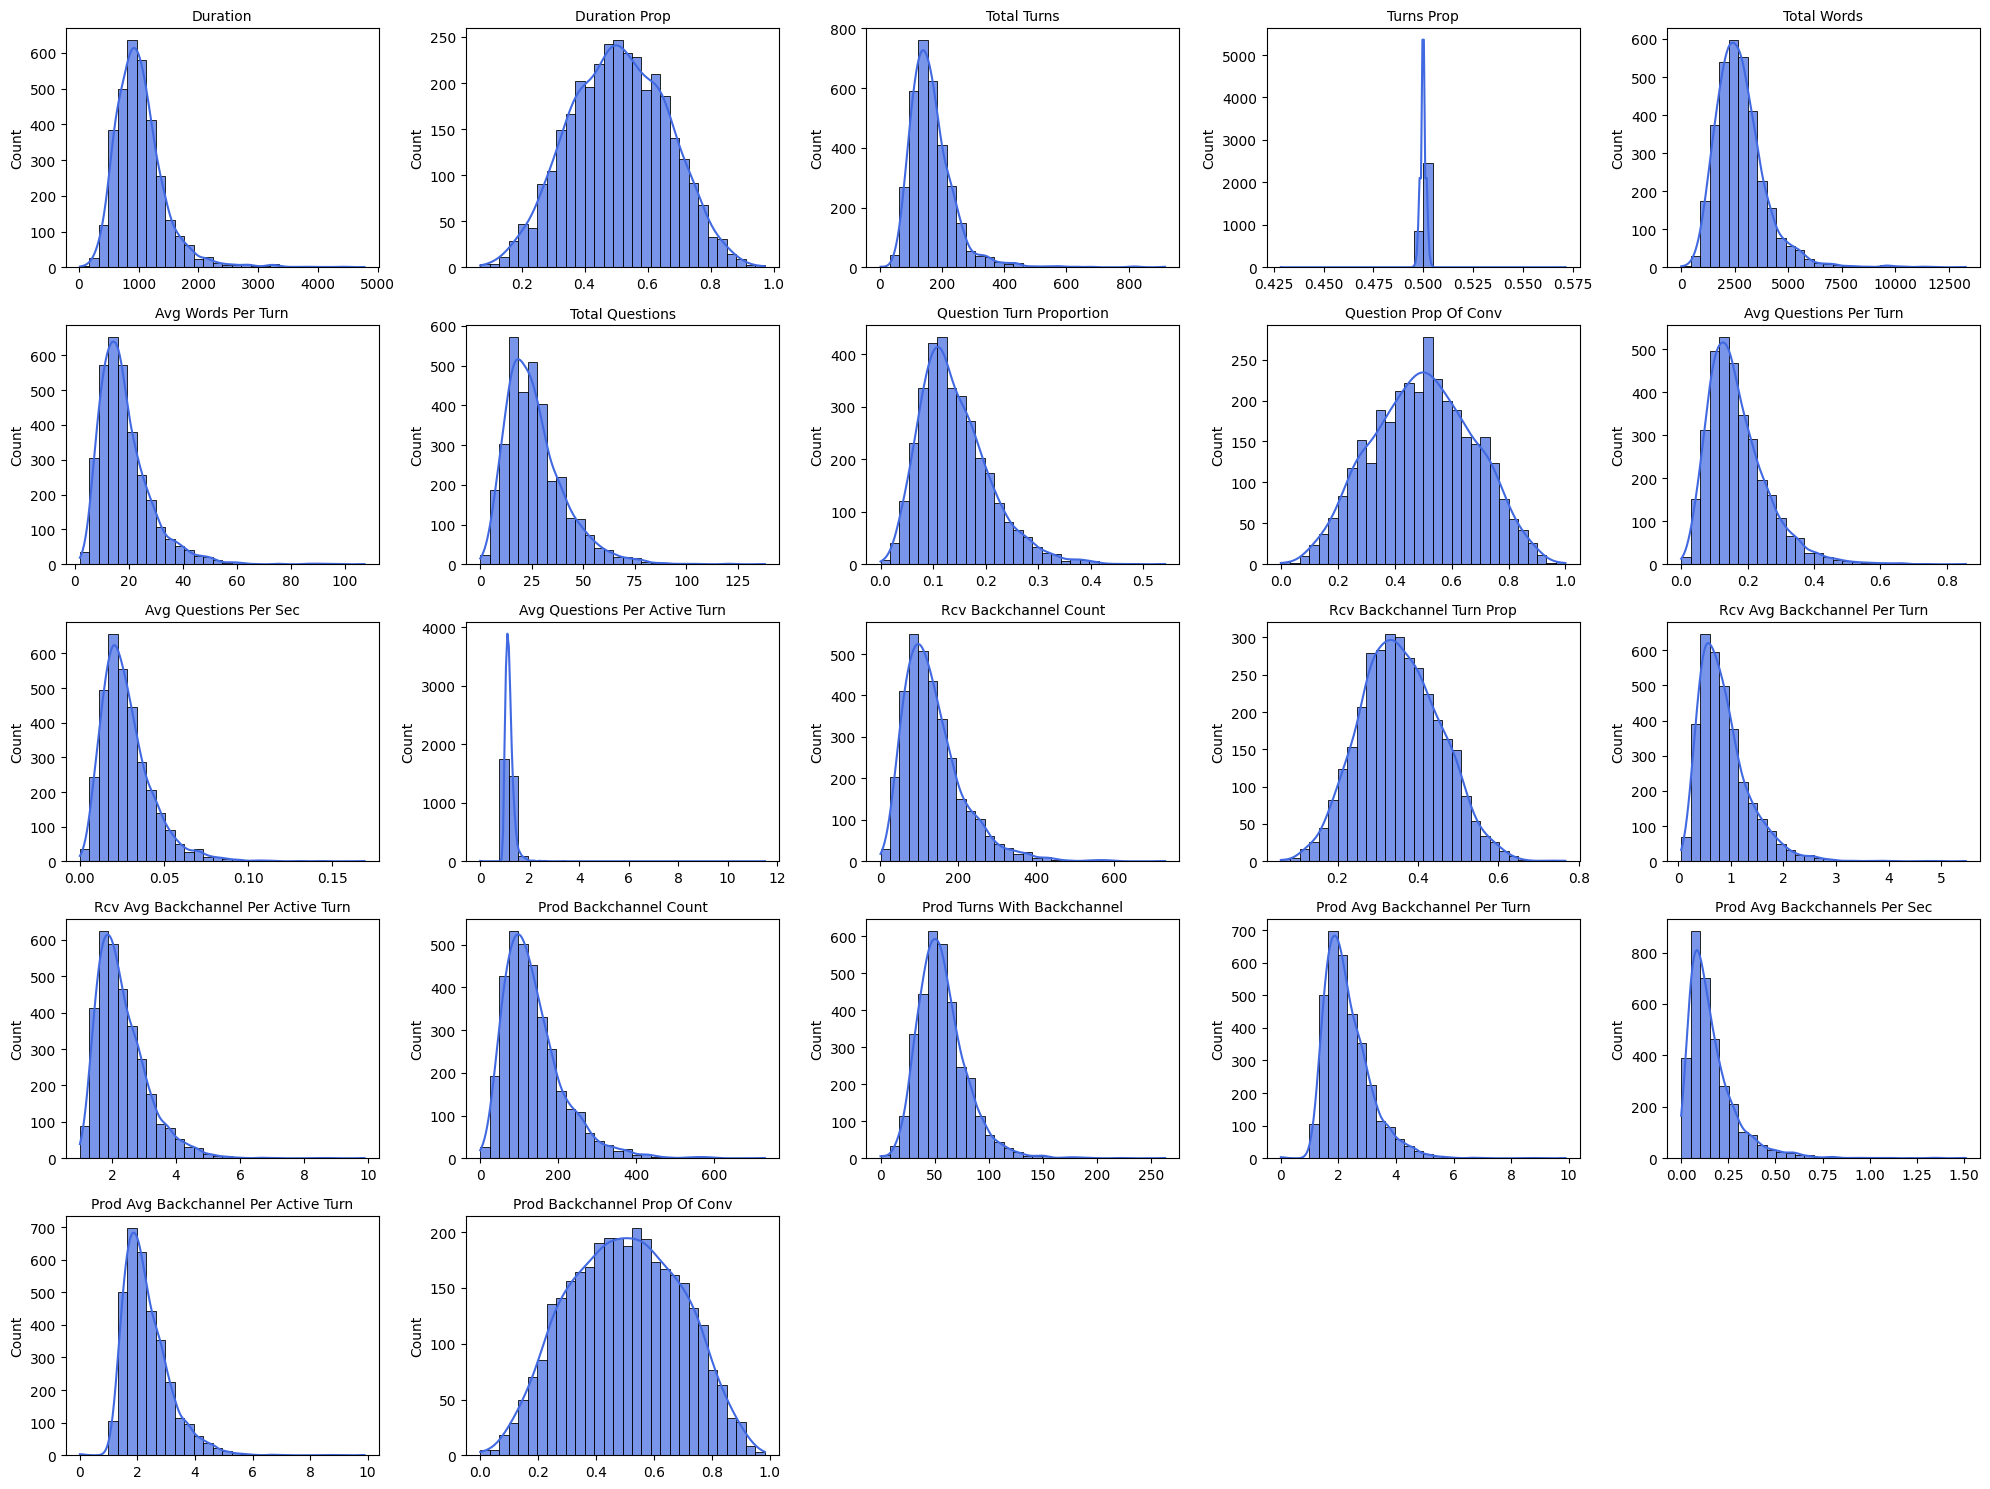

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric columns you care about
num_cols = [
    "duration",
    "duration_prop",
    "total_turns",
    "turns_prop",
    "total_words",
    "avg_words_per_turn",
    "total_questions",
    "question_turn_proportion",
    "question_prop_of_conv",
    "avg_questions_per_turn",
    "avg_questions_per_sec",
    "avg_questions_per_active_turn",
    "rcv_backchannel_count",
    "rcv_backchannel_turn_prop",
    "rcv_avg_backchannel_per_turn",
    "rcv_avg_backchannel_per_active_turn",
    "prod_backchannel_count",
    "prod_turns_with_backchannel",
    "prod_avg_backchannel_per_turn",
    "prod_avg_backchannels_per_sec",
    "prod_avg_backchannel_per_active_turn",
    "prod_backchannel_prop_of_conv"
]

# plot setup
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5,5, i)
    sns.histplot(convo_person[col], bins=30, kde=True, color="royalblue", alpha=0.7)
    plt.title(col.replace("_", " ").title(), fontsize=10)
    plt.xlabel("")
plt.tight_layout()
plt.show()


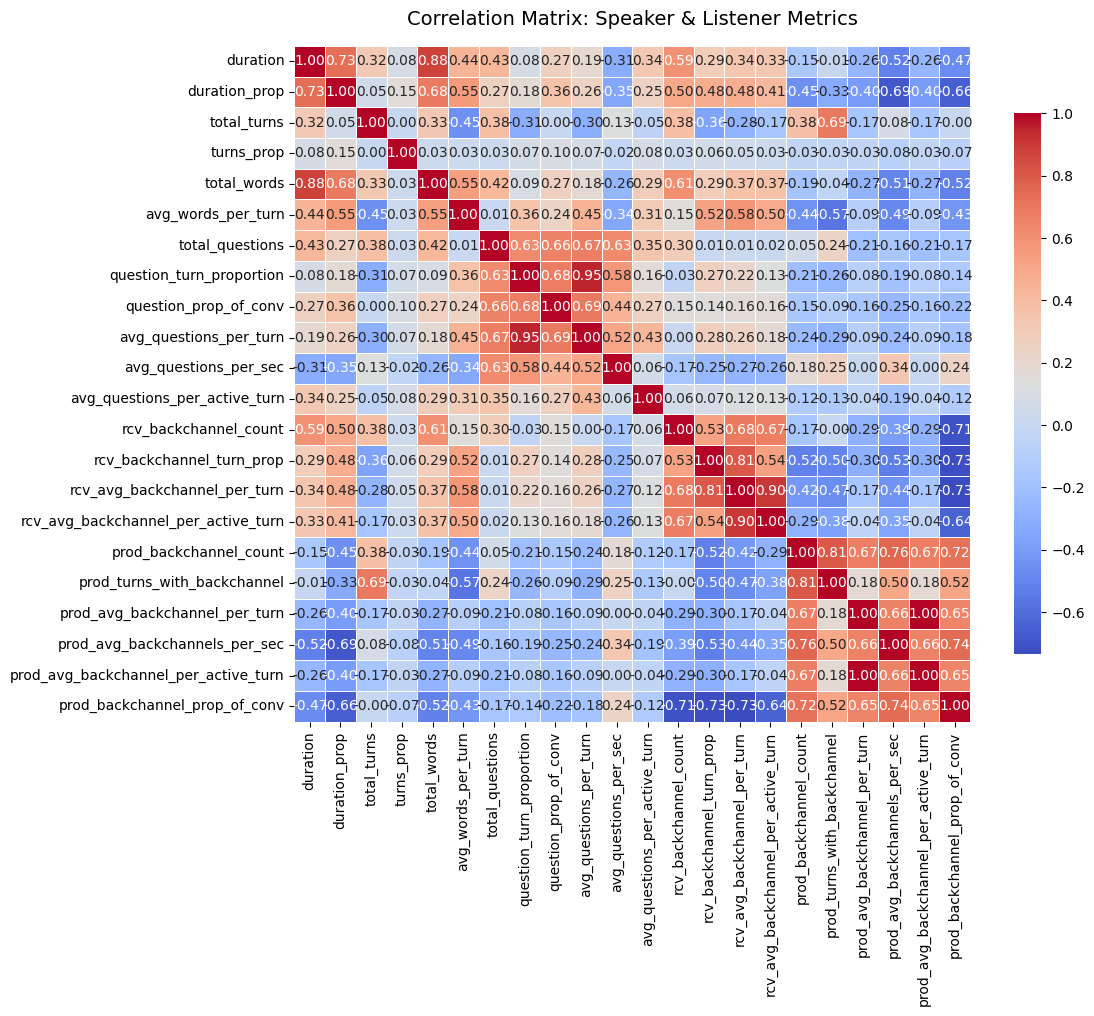

In [19]:
# compute correlation matrix
corr = convo_person[num_cols].corr(method="pearson")

# visualize
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,                # show values
    fmt=".2f",                 # 2 decimal places
    cmap="coolwarm",           # color map
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=0.5
)
plt.title("Correlation Matrix: Speaker & Listener Metrics", fontsize=14, pad=15)
plt.tight_layout()
plt.show()


#### Correlation w/ survey

In [19]:
# for i in survey.columns:
#     print (i)

In [20]:
survey_cols = [
    "user_id",
    "partner_id",
    "conversation_id",
    "conv_leader",
    "my_turn_length",
    "your_turn_length",
    "topic_diversity",
    "turn_overlap_gap",
    "how_enjoyable",
    "i_like_you",
    "you_like_me",
]

survey_small = survey[survey_cols].copy()


In [21]:
convo_cols = [
    "duration",
    "duration_prop",
    "total_turns",
    "turns_prop",
    "total_words",
    "avg_words_per_turn",
    "total_questions",
    "question_turn_proportion",
    "question_prop_of_conv", # Qs / num of all Qs
    "avg_questions_per_turn",
    "avg_questions_per_sec",
    "avg_questions_per_active_turn",
    "rcv_backchannel_turn_prop",
    "rcv_avg_backchannel_per_turn",
    "rcv_avg_backchannel_per_active_turn",
    "prod_turns_with_backchannel",
    "prod_avg_backchannel_per_turn",
    "prod_avg_backchannels_per_sec",
    "prod_avg_backchannel_per_active_turn",
    "prod_backchannel_prop_of_conv"
]

In [22]:
eda = convo_person.merge(
    survey_small,
    left_on=["conversation_id", "person_id"],
    right_on=["conversation_id", "user_id"],
    how="left",   
)

eda.head()

,conversation_id,person_id,duration,total_turns,total_words,avg_words_per_turn,total_questions,question_turn_proportion,avg_questions_per_turn,avg_questions_per_active_turn,...,user_id,partner_id,conv_leader,my_turn_length,your_turn_length,topic_diversity,turn_overlap_gap,how_enjoyable,i_like_you,you_like_me
0,0020a0c5-1658-4747-99c1-2839e736b481,5a73899f9cdd1800017786f0,715.71,172.0,2297.0,13.354651,14.0,0.081395,0.081395,1.000000,...,5a73899f9cdd1800017786f0,5fa072f4f4aa580b63834357,7.0,5.0,6.0,5.0,4.0,8.0,7.0,6.0
1,0020a0c5-1658-4747-99c1-2839e736b481,5fa072f4f4aa580b63834357,2049.09,173.0,5402.0,31.225434,43.0,0.190751,0.248555,1.303030,...,5fa072f4f4aa580b63834357,5a73899f9cdd1800017786f0,3.0,7.0,5.0,6.0,5.0,9.0,7.0,6.0
2,002d68da-7738-4177-89d9-d72ae803e0e4,5f482b0da1cde52de45f174c,1211.43,151.0,3488.0,23.099338,22.0,0.119205,0.145695,1.222222,...,5f482b0da1cde52de45f174c,5f57120cba207c18f058a62b,5.0,5.0,5.0,5.0,4.0,9.0,7.0,6.0
3,002d68da-7738-4177-89d9-d72ae803e0e4,5f57120cba207c18f058a62b,1011.01,150.0,3622.0,24.146667,30.0,0.166667,0.200000,1.200000,...,5f57120cba207c18f058a62b,5f482b0da1cde52de45f174c,7.0,7.0,6.0,5.0,5.0,7.0,6.0,4.0
4,00411458-8275-4b92-a000-d52187f03604,5d510396f6725b001a4fc025,459.12,117.0,1544.0,13.196581,27.0,0.188034,0.230769,1.227273,...,5d510396f6725b001a4fc025,5dd5bc3bd5cef8000b9861d5,8.0,4.0,6.0,6.0,3.0,8.0,5.0,6.0


In [23]:
# eda.isna().mean().sort_values(ascending=False).head(15)

<Figure size 1400x1000 with 0 Axes>

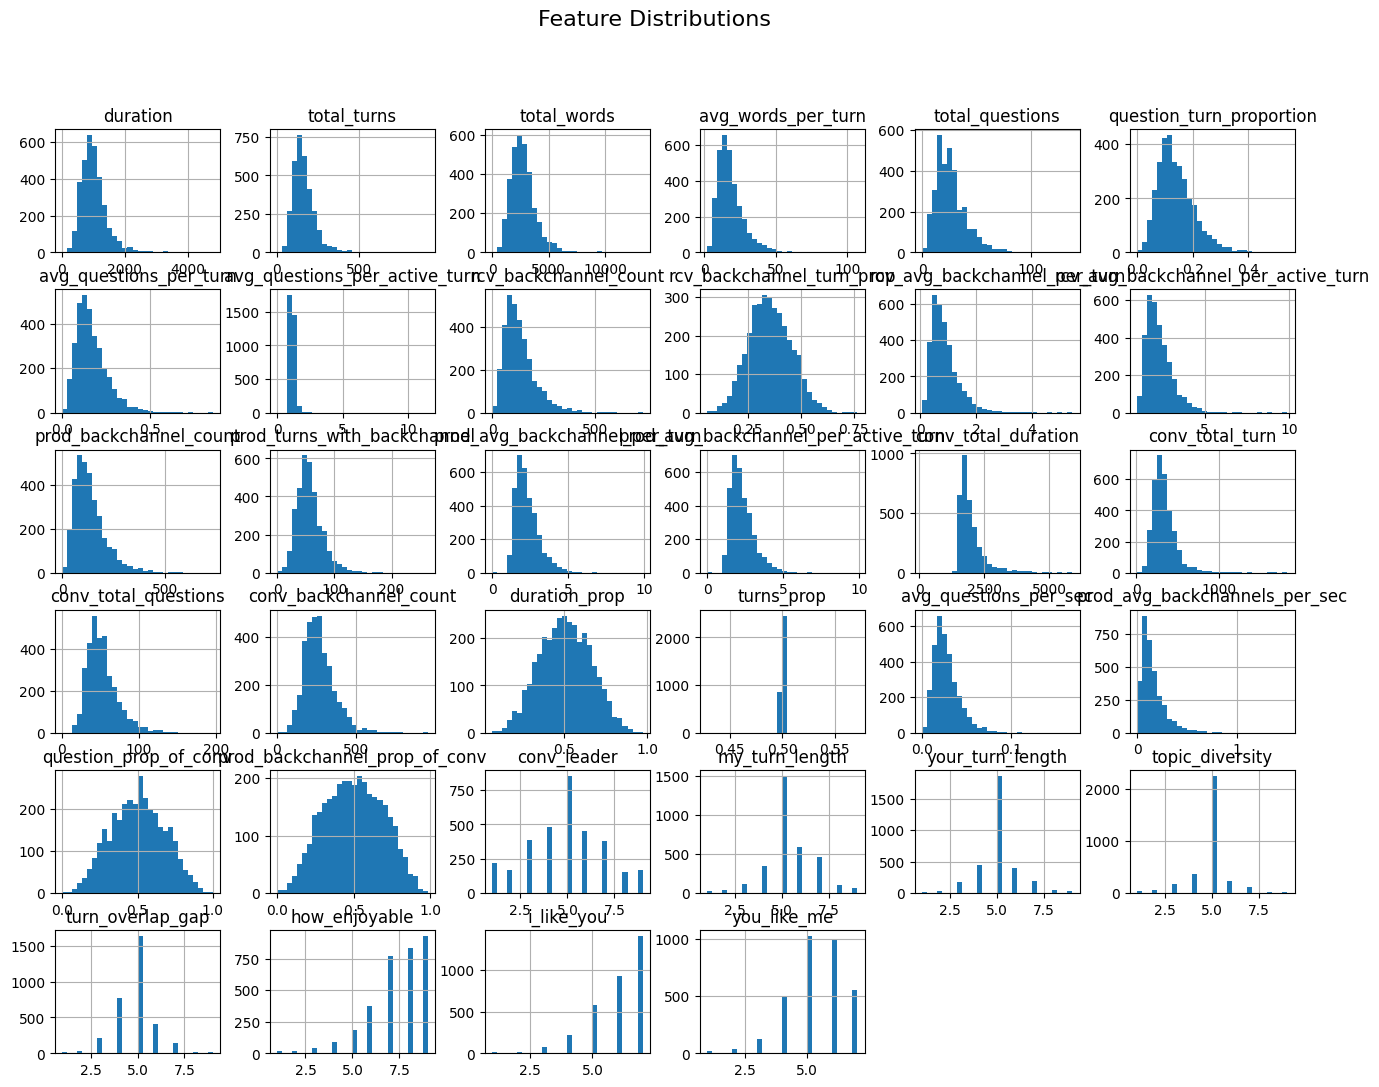

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = eda.select_dtypes("number").columns

plt.figure(figsize=(14, 10))
eda[numeric_cols].hist(bins=30, figsize=(16, 12))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [26]:
# survey_cols

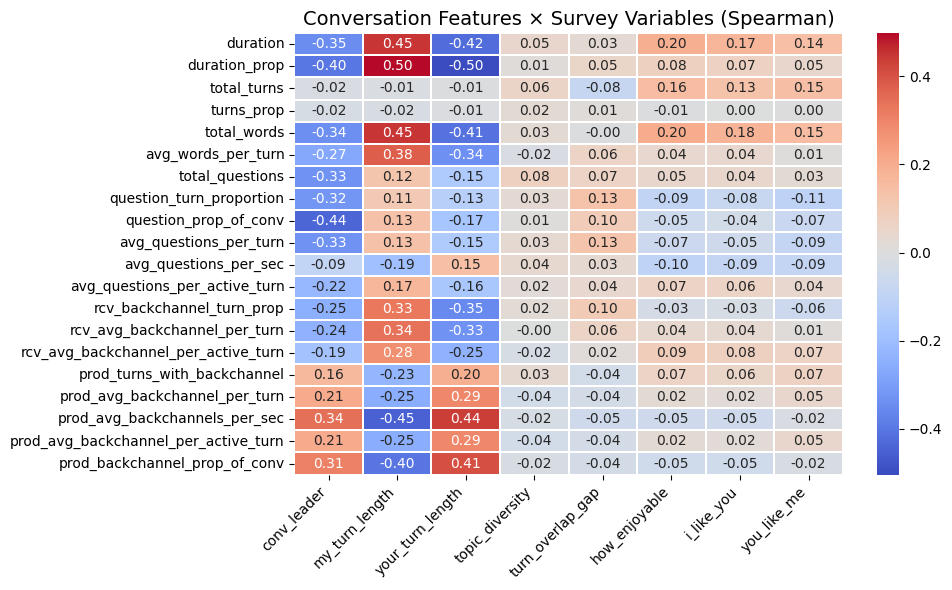

In [27]:
id_like = {"conversation_id", "person_id", "user_id", "partner_id"}
convo_cols = [c for c in convo_cols if c in eda.columns and c not in id_like]
survey_cols = [c for c in survey_cols if c in eda.columns and c not in id_like]

numeric_eda = eda.select_dtypes(include=["number"])

convo_cols_num = [c for c in convo_cols if c in numeric_eda.columns]
survey_cols_num = [c for c in survey_cols if c in numeric_eda.columns]

corr_cross = (
    numeric_eda[convo_cols_num + survey_cols_num]
    .corr(method="spearman")
    .loc[convo_cols_num, survey_cols_num]
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_cross,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.3,
)
plt.title("Conversation Features × Survey Variables (Spearman)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [28]:
new_survey_vars = [
    "how_enjoyable",
    "i_like_you",
    "you_like_me",
]


new_convo_vars = [
    "duration",
    "duration_prop",
    "turns_prop",
    "total_words",
    "avg_words_per_turn",
    "total_questions",
    "question_turn_proportion",
    "question_prop_of_conv", # Qs / num of all Qs
    "avg_questions_per_turn",
    "avg_questions_per_sec",
    "avg_questions_per_active_turn",
    "rcv_backchannel_turn_prop",
    "rcv_avg_backchannel_per_turn",
    "rcv_avg_backchannel_per_active_turn",
    "prod_turns_with_backchannel",
    "prod_avg_backchannel_per_turn",
    "prod_avg_backchannels_per_sec",
    "prod_avg_backchannel_per_active_turn",
    "prod_backchannel_prop_of_conv"
]

In [29]:
id_like = {"conversation_id", "person_id", "user_id", "partner_id"}
new_convo_vars = [c for c in new_convo_vars if c in eda.columns and c not in id_like]
new_survey_vars = [c for c in new_survey_vars if c in eda.columns and c not in id_like]

numeric_eda = eda.select_dtypes(include=["number"])

new_convo_vars_num = [c for c in new_convo_vars if c in numeric_eda.columns]
new_survey_vars_num = [c for c in new_survey_vars if c in numeric_eda.columns]

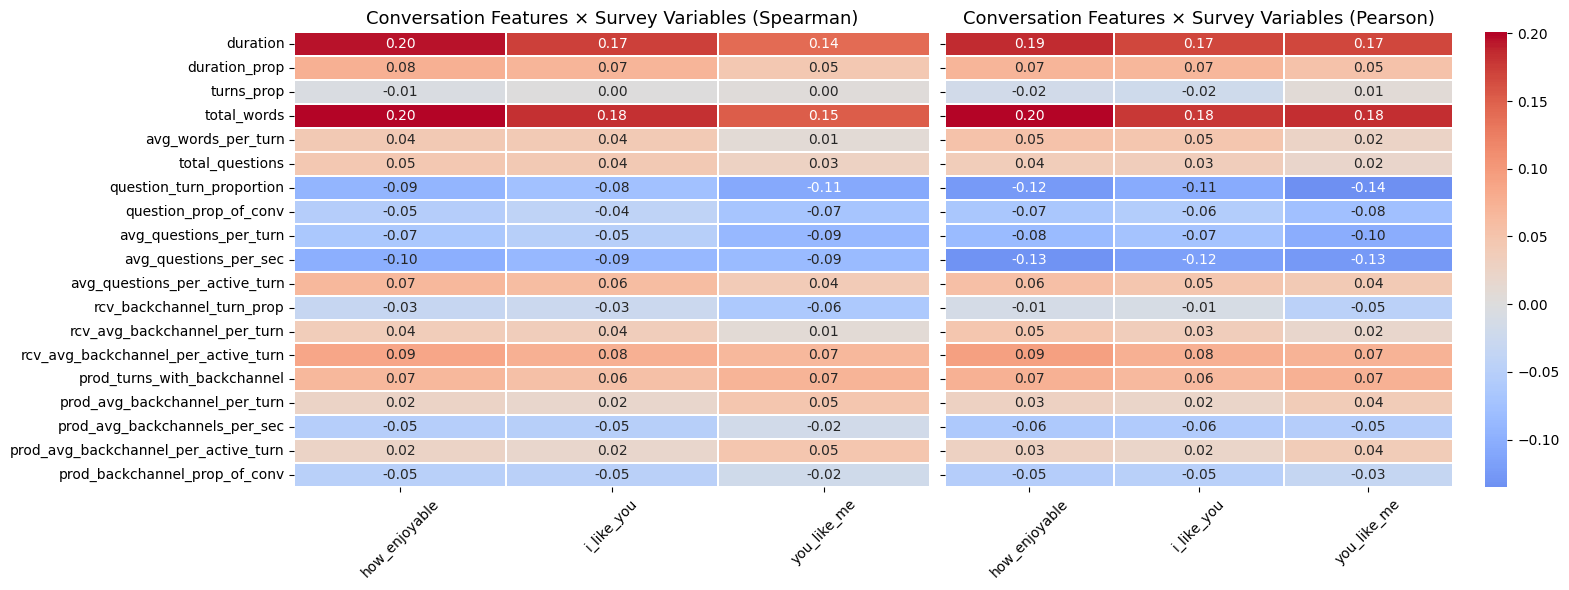

In [30]:
# define correlation matrices
corr_spearman = (
    numeric_eda[new_convo_vars_num + new_survey_vars_num]
    .corr(method="spearman")
    .loc[new_convo_vars_num, new_survey_vars_num]
)

corr_pearson = (
    numeric_eda[new_convo_vars_num + new_survey_vars_num]
    .corr(method="pearson")
    .loc[new_convo_vars_num, new_survey_vars_num]
)

# side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.heatmap(
    corr_spearman,
    ax=axes[0],
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.3,
    cbar=False  # disable colorbar on left for cleaner side-by-side view
)
axes[0].set_title("Conversation Features × Survey Variables (Spearman)", fontsize=13)
axes[0].tick_params(axis='x', rotation=45)

sns.heatmap(
    corr_pearson,
    ax=axes[1],
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.3,
)
axes[1].set_title("Conversation Features × Survey Variables (Pearson)", fontsize=13)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### Regression Analysis (~enjoyment)

In [31]:
# %pip install statsmodels
import statsmodels.api as sm
import pandas as pd


In [32]:
y = numeric_eda['how_enjoyable']
X_vars = [
    'duration', 'duration_prop', 'turns_prop',
     'avg_words_per_turn', 'total_questions',
    'question_turn_proportion', 'question_prop_of_conv',
    'avg_questions_per_turn', 'avg_questions_per_sec', 'avg_questions_per_active_turn',
    'rcv_backchannel_turn_prop', 'rcv_avg_backchannel_per_turn', 'rcv_avg_backchannel_per_active_turn',
    'prod_turns_with_backchannel', 'prod_avg_backchannel_per_turn', 'prod_avg_backchannels_per_sec',
    'prod_avg_backchannel_per_active_turn', 'prod_backchannel_prop_of_conv'
] # 'total_words','total_turns',

In [33]:
# numeric_eda['how_enjoyable'].describe()
# numeric_eda[X_vars].isna().sum()
# numeric_eda[X_vars].nunique()


In [34]:
numeric_eda.head()

,duration,total_turns,total_words,avg_words_per_turn,total_questions,question_turn_proportion,avg_questions_per_turn,avg_questions_per_active_turn,rcv_backchannel_count,rcv_backchannel_turn_prop,...,question_prop_of_conv,prod_backchannel_prop_of_conv,conv_leader,my_turn_length,your_turn_length,topic_diversity,turn_overlap_gap,how_enjoyable,i_like_you,you_like_me
0,715.71,172.0,2297.0,13.354651,14.0,0.081395,0.081395,1.000000,83.0,0.261628,...,0.245614,0.764205,7.0,5.0,6.0,5.0,4.0,8.0,7.0,6.0
1,2049.09,173.0,5402.0,31.225434,43.0,0.190751,0.248555,1.303030,269.0,0.531792,...,0.754386,0.235795,3.0,7.0,5.0,6.0,5.0,9.0,7.0,6.0
2,1211.43,151.0,3488.0,23.099338,22.0,0.119205,0.145695,1.222222,96.0,0.350993,...,0.423077,0.441860,5.0,5.0,5.0,5.0,4.0,9.0,7.0,6.0
3,1011.01,150.0,3622.0,24.146667,30.0,0.166667,0.200000,1.200000,76.0,0.293333,...,0.576923,0.558140,7.0,7.0,6.0,5.0,5.0,7.0,6.0,4.0
4,459.12,117.0,1544.0,13.196581,27.0,0.188034,0.230769,1.227273,61.0,0.264957,...,0.509434,0.755020,8.0,4.0,6.0,6.0,3.0,8.0,5.0,6.0


In [35]:
results = []

for x in X_vars:
    temp = numeric_eda[[x, 'how_enjoyable']].dropna()  # ensure alignment + drop NaNs
    X = sm.add_constant(temp[[x]])
    y = temp['how_enjoyable']
    model = sm.OLS(y, X).fit()
    results.append({
        'variable': x,
        'coef': model.params[x],
        'p_value': model.pvalues[x],
        'r_squared': model.rsquared
    })

summary_df = pd.DataFrame(results).sort_values('coef', ascending=False)
summary_df

,variable,coef,p_value,r_squared
1,duration_prop,0.698206,6.658397e-05,0.004875
9,avg_questions_per_active_turn,0.350855,1.139582e-03,0.003247
12,rcv_avg_backchannel_per_active_turn,0.176879,8.925099e-08,0.008748
11,rcv_avg_backchannel_per_turn,0.146639,6.383364e-03,0.002283
14,prod_avg_backchannel_per_turn,0.056729,8.697649e-02,0.000900
16,prod_avg_backchannel_per_active_turn,0.056729,8.697649e-02,0.000900
3,avg_words_per_turn,0.007966,3.169866e-03,0.002672
13,prod_turns_with_backchannel,0.004921,2.087168e-05,0.005549
4,total_questions,0.003776,4.119700e-02,0.001280
0,duration,0.000640,1.634068e-26,0.034289


/home/xpan02/ipykernel_1661931/2652541927.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sig, x='coef', y='variable', palette='coolwarm', orient='h')


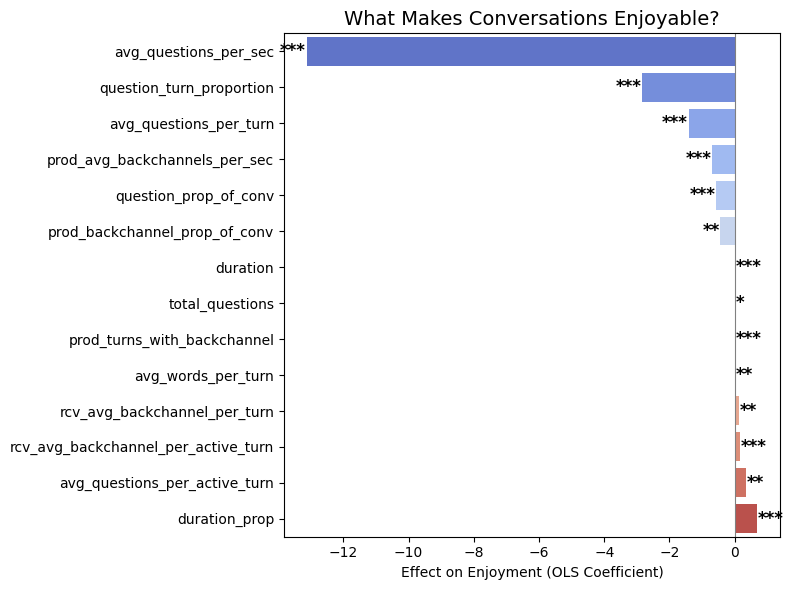

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define star function
def p_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

sig = summary_df[summary_df['p_value'] < 0.05].copy()
sig['stars'] = sig['p_value'].apply(p_to_stars)

# sort for nicer plot
sig = sig.sort_values('coef', ascending=True)

# make barplot
plt.figure(figsize=(8,6))
sns.barplot(data=sig, x='coef', y='variable', palette='coolwarm', orient='h')

# add significance stars at the end of each bar
for i, (coef, stars) in enumerate(zip(sig['coef'], sig['stars'])):
    plt.text(
        x=coef + np.sign(coef)*0.02,  # offset a little in the direction of the bar
        y=i,
        s=stars,
        va='center',
        ha='left' if coef > 0 else 'right',
        fontsize=12,
        fontweight='bold'
    )

plt.title("What Makes Conversations Enjoyable?", fontsize=14)
plt.xlabel("Effect on Enjoyment (OLS Coefficient)")
plt.ylabel("")
plt.axvline(0, color='grey', lw=0.8)
plt.tight_layout()
plt.show()


The above displays the standardized coefficients from an OLS regression predicting self-reported enjoyment from various behavioral features of conversation. Each coefficient represents the unique contribution of a feature to conversational enjoyment, controlling for all other variables.

Consistent with recent studies (e.g., Yeomans et al., 2019; Huang et al., 2017), we might expect question-asking to enhance social engagement. However, our analysis finds that higher-frequency question-asking (e.g., avg_questions_per_sec, avg_questions_per_turn, question_turn_proportion) is negatively associated with enjoyment. This contrasts with prior work showing that more frequent, responsive questions generally lead to greater liking. One potential explanation is that high-frequency questioning in our context may feel effortful or intrusive—possibly reflecting conversational imbalance or nervousness rather than curiosity. Interestingly, avg_questions_per_active_turn emerges as a positive predictor, suggesting that when questions are embedded in longer, content-rich turns, they may serve to deepen rather than fragment the interaction. This opens up key questions for further analysis: Do questions in longer turns show greater topical elaboration or self-disclosure? Are they more contextually anchored? Extracting semantic features (e.g., depth, specificity, or personal relevance) from these turns could help test these hypotheses.


Backchanneling patterns show a related but asymmetrical trend. While receiving frequent backchannels (e.g., rcv_avg_backchannel_per_sec, rcv_avg_backchannel_per_turn) predicts lower enjoyment, producing backchannels correlates positively with enjoyment. This somewhat mirrors findings by Lepistö et al. (2025), who showed that lacking backchannel feedback from one’s partner induces discomfort—suggesting that unbalanced or excessive backchannels may disrupt rhythm or feel performative. It’s possible that receiving frequent backchannels might coincide with awkward pauses, topic drift, or mismatched pacing. In contrast, producing backchannels may support the speaker and foster conversational alignment. To unpack this, we might analyze temporal alignment (e.g., placement of backchannels relative to speaker pauses), backchannel density across time, or the interaction between backchannels and topic continuity.

Together, these findings suggest that conversational enjoyment may depend not on how often behaviors occur, but how and when they’re deployed. Future analysis should combine behavioral signals with semantic structure, such as topic depth, novelty, or responsiveness, to clarify when questioning and feedback serve as constructive scaffolds versus when they disrupt conversational flow.

## Methodological Design and Feasibility Assessment

One productive way to leverage the CANDOR dataset is to investigate **conversational mimicry** —- the extent to which interlocutors repeat, echo, or semantically mirror one another -- as an emergent structural property of dialogue associated with enjoyment and relational attunement. To capture both surface-level linguistic repetition and higher-order semantic alignment, this study integrates two complementary similarity paradigms: (1) <font color='blue'>lexical mimicry detection through the **Finding Similar Items framework**, which employs shingling, MinHash, and locality-sensitive hashing to identify probabilistic lexical overlaps</font>; and (2) <font color='blue'>semantic mimicry detection based on sentence embeddings and **cosine similarity**, which quantifies conceptual resonance beyond shared wording</font>. Together, these approaches provide a computationally efficient yet theoretically grounded representation of conversational alignment, illuminating how mimicry functions as both a cognitive mechanism and a social signal within natural dialogue.

**1. Data Representation**

Each conversation is modeled as a sequence of speaker turns, with each turn serving as the basic unit of analysis. To detect mimicry, each turn is encoded in two complementary forms: **lexical** and **semantic**.

For **lexical representation**, the text of each turn is tokenized into overlapping *shingles*—that is, contiguous sequences of words (word-level, (k=3)) and characters (character-level, (k=8)). These shingled sets capture local phrase structures and fine-grained lexical reuse. Each turn (t) is represented as a set (S_t), and lexical overlap between two turns (i) and (j) is quantified using **Jaccard similarity**:
$$
J(S_i, S_j) = \frac{|S_i \cap S_j|}{|S_i \cup S_j|}
$$

This metric provides a scalable and interpretable foundation for detecting near-verbatim echoes or shared phrasing that reflect surface-level mimicry.

For **semantic representation**, each turn is encoded using the **MPNet sentence transformer**, which produces high-dimensional contextual embeddings. The similarity between two turns is quantified by the **cosine similarity** between their embeddings:
$$
\cos(\mathbf{e}_i, \mathbf{e}_j) = \frac{\mathbf{e}_i \cdot \mathbf{e}_j}{|\mathbf{e}_i||\mathbf{e}_j|}
$$
This representation captures conceptual or affective alignment that may occur even when lexical overlap is minimal, thus extending mimicry detection to deeper, meaning-based correspondence.


**2. Efficient Similarity Retrieval**

Because pairwise comparisons scale quadratically with the number of turns, efficiency is achieved through the **MinHash–Locality Sensitive Hashing (LSH)** framework (Broder, 1997; Leskovec et al., 2014). Each shingle set is transformed into a compact **MinHash signature** (128–256 hashes) that probabilistically preserves Jaccard similarity. These signatures are divided into *bands* (e.g., 32 bands × 4 rows), and only items sharing at least one band are considered potential matches. This approach drastically reduces computational cost while maintaining high recall for lexically similar turns.

For semantic similarity, an **Approximate Nearest Neighbor (ANN)** index (e.g., HNSW or FAISS) is used to retrieve the top-(k) semantically closest earlier turns for each utterance. Together, the LSH and ANN pipelines provide scalable yet sensitive mechanisms for detecting mimicry across both lexical and semantic dimensions.


**3. Constructing the Mimicry Graph**

Each conversation is represented as a **directed multigraph**, in which nodes correspond to turns and edges denote temporal or similarity-based relations. Three edge types are defined:

1. **Temporal edges** connect consecutive turns $t \rightarrow t + 1$ to preserve sequential order.
2. **Lexical mimicry edges** connect a later turn (t) to an earlier turn (j < t) if their Jaccard similarity exceeds a threshold (e.g., 0.3) or if (j) is among the top-(k) LSH candidates.
3. **Semantic mimicry edges** connect later to earlier turns based on cosine similarity (e.g., ≥ 0.7).

This graph representation captures the asymmetric and evolving structure of conversational imitation, allowing the analysis of mimicry **directionality** (who echoes whom), **latency** (delay between stimulus and echo), and **density** (the degree of interconnectedness through repetition or rephrasing).

**4. Quantifying Mimicry and Dynamics**

Several interpretable metrics are derived at both the speaker and dyad levels. The **lexical mimicry rate** measures the proportion of turns in which a speaker repeats another’s phrasing above threshold; the **semantic mimicry rate** parallels this for conceptual alignment. **Latency** quantifies the average turn gap between an original utterance and its echo. **Mimicry strength** reflects mean similarity values, while **reciprocity** captures the symmetry of mimicry exchanges between partners. Temporal dynamics are assessed via the **coefficient of variation** of inter-mimicry intervals, indexing rhythm and burstiness.

To assess statistical significance, observed metrics are compared against **null models** obtained by randomly shuffling speaker labels while preserving text and sequence. The resulting standardized **z-scores** indicate the extent to which mimicry exceeds chance-level alignment.

**5. Contextualizing Mimicry: Topics and Visualization**

To situate mimicry within thematic structure, **k-means clustering** is applied to sentence embeddings, grouping turns into local topical segments (Week 3: “Clustering”). Mimicry edges are categorized as *within-topic* or *cross-topic*, revealing whether imitation occurs primarily within sustained discussions or across topic boundaries. **Principal Component Analysis (PCA)** provides low-dimensional visualizations of conversational trajectories, where mimicry edges can be overlaid to illustrate convergence, divergence, and callback patterns. These visualizations support qualitative interpretation of how mimicry shapes conversational flow.

**6. Statistical Analysis**

To evaluate whether mimicry predicts **conversational enjoyment**, mixed-effects regression models are fit of the form:
$$
\text{Enjoyment} \sim \text{LexicalMimicry} + (1|\text{Dyad})
$$

$$
\text{Enjoyment} \sim \text{SemanticMimicry} + (1|\text{Dyad})
$$

**7. Feasibility and Robustness**

The proposed pipeline is computationally tractable. A conversation of several hundred turns yields tens of thousands of pairwise comparisons, efficiently reduced via LSH and ANN. Graph construction and clustering operations scale linearly with edge count, enabling deployment on standard hardware. Robustness is evaluated through sensitivity analyses varying the Jaccard ($tau_J$) and cosine ($tau_C$) thresholds, shingle sizes ($k$), and embedding models (e.g., MiniLM, all-MPNet-base). Stability of clustering and mimicry metrics is assessed across random seeds and cluster sizes ($k=4–8$).


**8. Expected Contribution**

By integrating scalable similarity detection with semantic modeling, this framework advances the empirical study of **alignment and enjoyment in human dialogue**. Lexical mimicry reflects immediate, surface-level coordination, whereas semantic mimicry captures deeper conceptual resonance. Modeling their interplay as a dynamic, directed network reveals how enjoyable conversations emerge not from uniform imitation, but from balanced, temporally distributed patterns of echo and elaboration. This approach thus reframes conversation as a **self-organizing system of linguistic adaptation**, bridging computational modeling with social-cognitive theory.

## References

Cooney, G., & Wheatley, T. (2025). Conversation. In D. T. Gilbert, S. T. Fiske, E. J. Finkel, & W. B. Mendes (Eds.), The handbook of social psychology (6th ed.). Situational Press. https://doi.org/10.70400/ZKHH6259

Speer, S. P. H., Mwilambwe-Tshilobo, L., Tsoi, L., Burns, S. M., Falk, E. B., & Tamir, D. I. (2024). Hyperscanning shows friends explore and strangers converge in conversation. Nature Communications, 15(1), 7781. https://doi.org/10.1038/s41467-024-51990-7

Speer, S. P. H., Sened, H., Mwilambwe-Tshilobo, L., Falk, E. B., Tsoi, L., Burns, S. M., & Tamir, D. I. (2025). Finding agreement: fMRI hyperscanning reveals dyads that explore in mental state space facilitate opinion alignment. bioRxiv. https://doi.org/10.1101/2024.10.03.616501

See, A., Roller, S., Kiela, D. & Weston, J. What makes a good conversation? How controllable attributes affect human judgments. Preprint at http://arxiv.org/abs/1902.08654 (2019).

Templeton, E. M., Chang, L. J., Reynolds, E. A., Cone LeBeaumont, M. D. & Wheatley, T. Fast response times signal social connection in conversation. Proc. Natl Acad. Sci. USA 119, e2116915119 (2022).

Kardas, M., Kumar, A. & Epley, N. Overly shallow? Miscalibrated expectations create a barrier to deeper conversation. J. Pers. Soc. Psychol. 122, 367–398 (2022).
Cooney, G., Gilbert, D. T. & Wilson, T. D. The novelty penalty: why do people like talking about new experiences but hearing about old ones? Psychol. Sci. 28, 380–394 (2017).

Kardas, M., Schroeder, J., & O'Brien, E. (2022). Keep talking:(Mis) understanding the hedonic trajectory of conversation. Journal of Personality and Social Psychology, 123(4), 717.

Epley, N., & Schroeder, J. (2014). Mistakenly seeking solitude. Journal of Experimental Psychology: General, 143(5), 1980.

Schroeder, J., Lyons, D., & Epley, N. (2022). Hello, stranger? Pleasant conversations are preceded by concerns about starting one. Journal of Experimental Psychology: General, 151(5), 1141.

Templeton, E. M., Chang, L. J., Reynolds, E. A., Cone LeBeaumont, M. D., & Wheatley, T. (2023). Long gaps between turns are awkward for strangers but not for friends. Philosophical Transactions of the Royal Society B, 378(1875), 20210471.

Westgate, E. C. & Wilson, T. D. Boring thoughts and bored minds: The MAC model of boredom and cognitive engagement. Psychol. Rev. 125, 689–713 (2018).

Reece, A., Cooney, G., Bull, P., Chung, C., Dawson, B., Fitzpatrick, C., ... & Marin, S. (2023). The CANDOR corpus: Insights from a large multimodal dataset of naturalistic conversation. Science Advances, 9(13), eadf3197.

Kusner, M., Sun, Y., Kolkin, N., & Weinberger, K. (2015, June). From word embeddings to document distances. In International conference on machine learning (pp. 957-966). PMLR.

Yeomans, M., Brooks, A. W., Huang, K., Minson, J., & Gino, F. (2019). It helps to ask: The cumulative benefits of asking follow-up questions.

Huang, K., Yeomans, M., Brooks, A. W., Minson, J., & Gino, F. (2017). It doesn’t hurt to ask: Question-asking increases liking. Journal of personality and social psychology, 113(3), 430.

Lepistö, S., Koskinen, E., Söderman, M., Celio, F., Wuolio, M., Jääskeläinen, I., ... & Harjunen, V. J. (2025). Listener's disengagement heightens speaker's arousal during in-person self-disclosure–but not via video call. Computers in Human Behavior Reports, 18, 100620.
